<a href="https://colab.research.google.com/github/Vevan05/Machine-Learning-TSLA-Stock/blob/main/PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving TSLA.csv to TSLA.csv


In [2]:
# Reading TSLA.csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("TSLA.csv")

print(df.head())

         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500


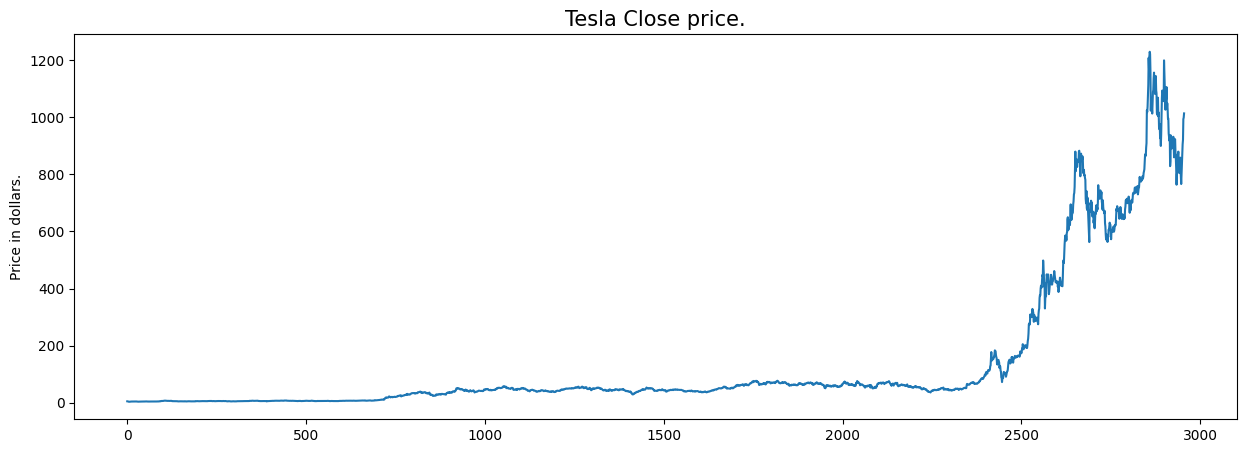

In [3]:
# Analysing Closing Price
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

# Figure shows upward trend

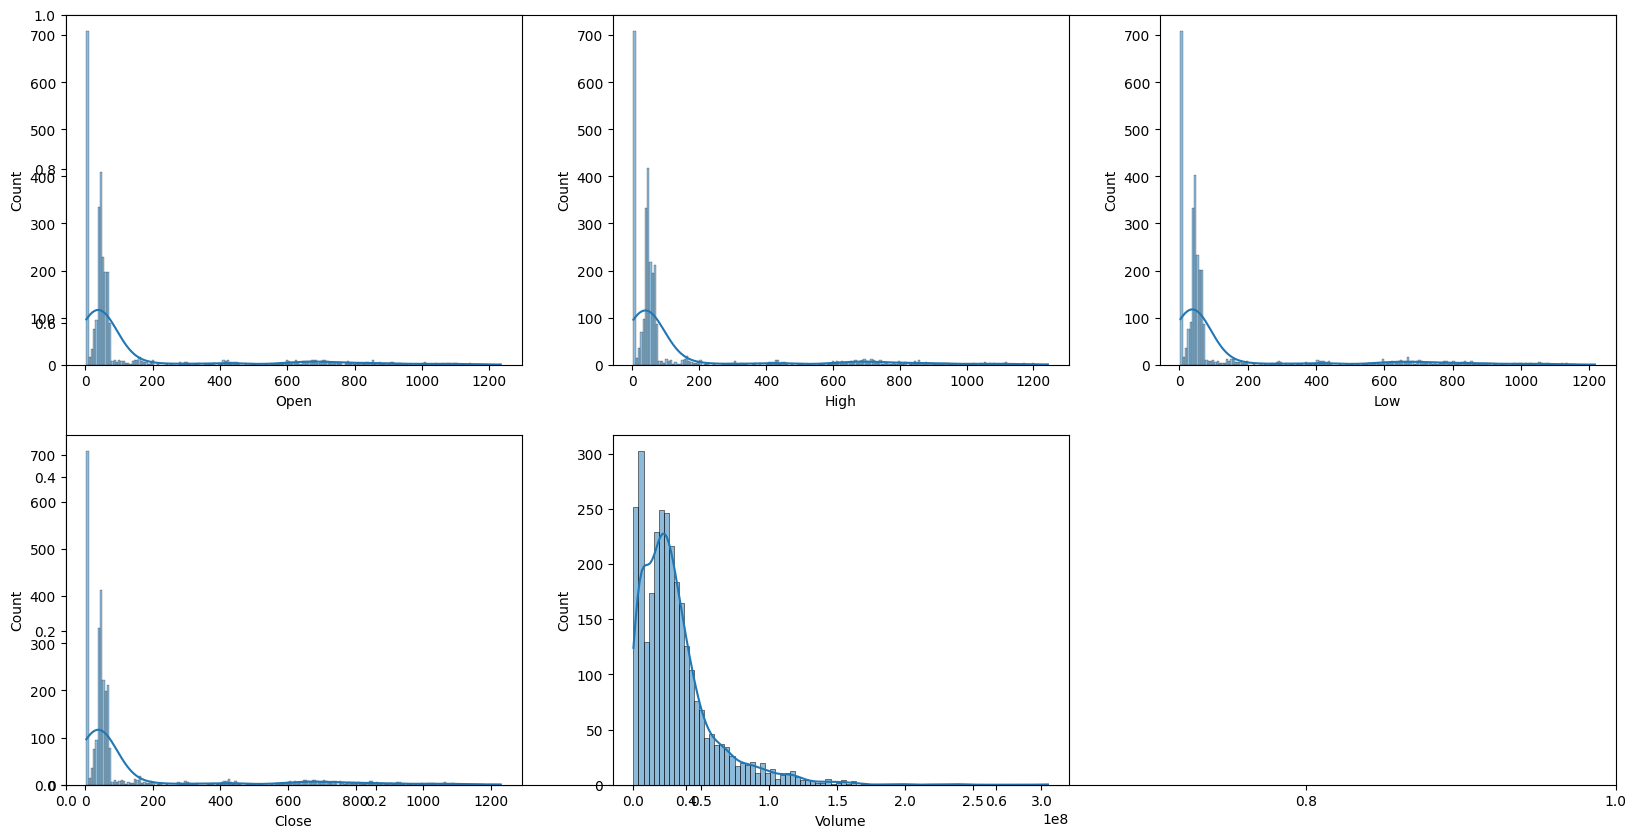

In [4]:
# Analysing OHLC Data

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(df[col], kde = True)
plt.show()

# Two peaks in OHLC Data
# Left-skewed Volume Graph

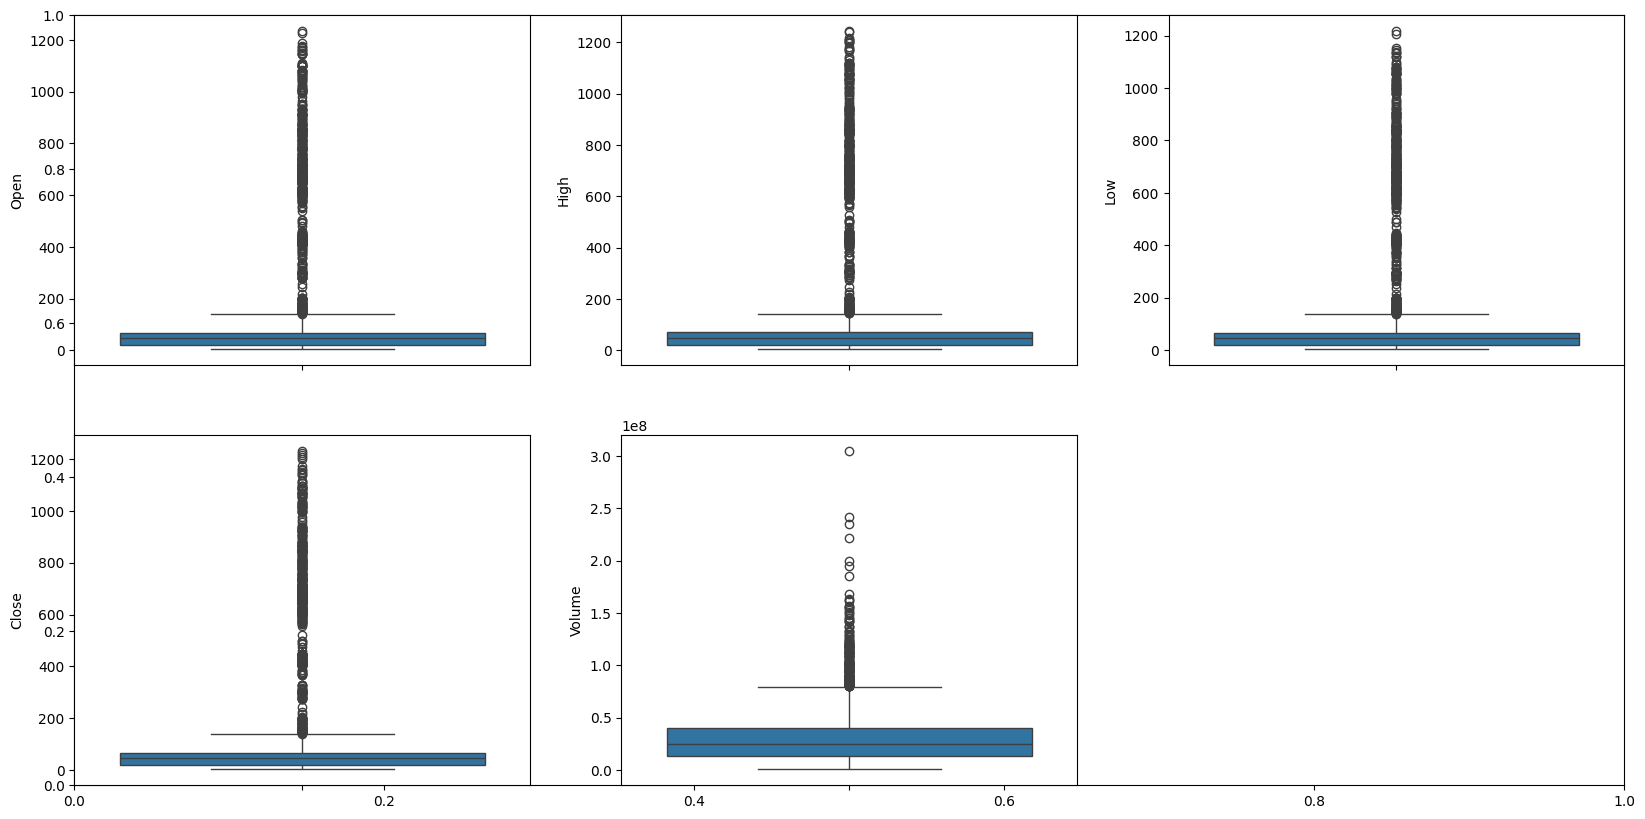

In [5]:
# Checking to see if any outliers

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

# Significant amount of outliers observed in Volume, while negligible amount in OHLC

In [6]:
# Creating new columns for day month and year
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,29,6,2010
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,30,6,2010
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,1,7,2010
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2,7,2010
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,6,7,2010


In [7]:
# Creating column quarterly results (these results affect stock market and is helpful in training the model)

df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,29,6,2010,1
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,30,6,2010,1
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,1,7,2010,0
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2,7,2010,0
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,6,7,2010,0


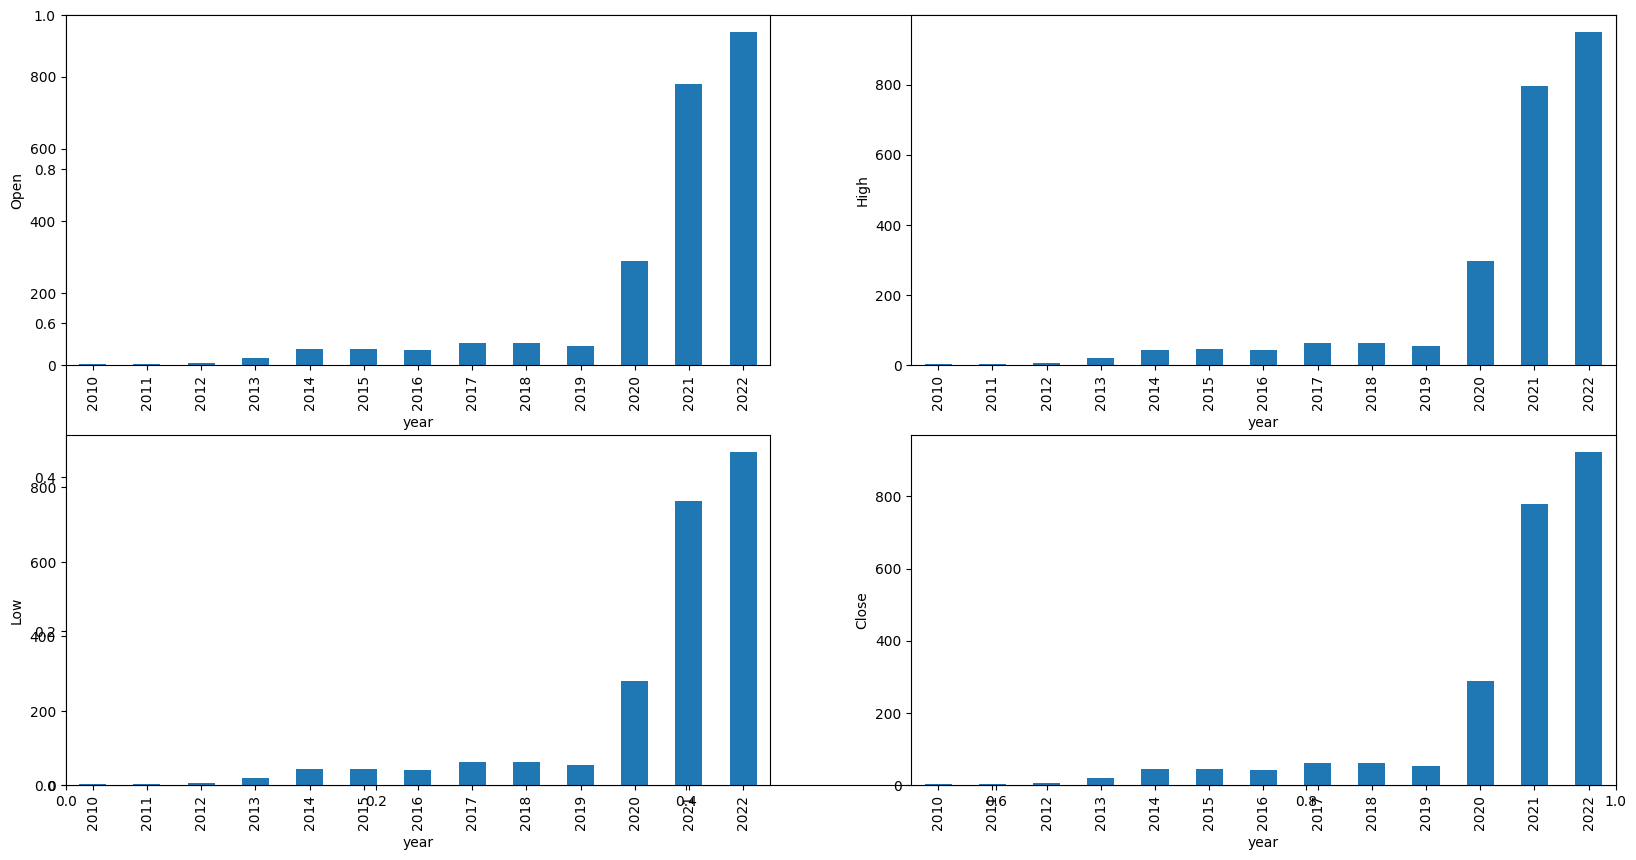

In [8]:
# Dropping Date from data and Plotting features on bar graphs

data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
  plt.ylabel(col)

plt.show()

# Stock has almost doubled from 2013 to 2014 and 2019 to 2020

In [9]:
# Adding more columns which will help train the model

df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [10]:
# Data Normalisation and Data Splitting into training and testing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.25, random_state=2022)

In [11]:
# Using LogisticRegression ML Model
# Calculates probabilities using a logistic (sigmoid) function that maps the input to values between 0 and 1, interpreting them as probabilities of classes.

from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(random_state=0)
classifier1.fit(features_train,target_train)

result_prediction1 = classifier1.predict(features_test)
print("Accuracy :",accuracy_score(target_test,result_prediction1))

Accuracy : 0.530446549391069


In [12]:
# Using XGBClassifier ML Model
# Builds multiple decision trees sequentially, where each new tree tries to correct errors made by the previous trees.

from xgboost import XGBClassifier

classifier2 = XGBClassifier()
classifier2.fit(features_train,target_train)

result_prediction2 = classifier2.predict(features_test)
print("Accuracy :",accuracy_score(target_test,result_prediction2))

Accuracy : 0.489851150202977


In [13]:
# Using SVM ML Model
# Finds the optimal hyperplane that maximizes the margin between different classes.

from sklearn.svm import SVC

classifier3 = SVC(kernel='poly', probability=True)
classifier3.fit(features_train,target_train)

result_prediction3 = classifier3.predict(features_test)
print("Accuracy :",accuracy_score(target_test,result_prediction3))

Accuracy : 0.5345060893098782
